In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("/content/Indian_Kids_Screen_Time.csv")

In [7]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [8]:
data.isnull()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9707,False,False,False,False,False,False,False,False
9708,False,False,False,False,False,False,False,False
9709,False,False,False,False,False,False,False,False
9710,False,False,False,False,False,False,False,False


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9707,False
9708,False
9709,False
9710,False


In [10]:
(data.duplicated()).sum()

np.int64(44)

In [11]:
data.corr(numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [13]:
data["Age"].dtypes


dtype('int64')

In [14]:
numerical_data = data.select_dtypes(include=np.number)

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

print("IQR values:\n", IQR)

IQR values:
 Age                                  6.00
Avg_Daily_Screen_Time_hr             1.97
Educational_to_Recreational_Ratio    0.11
dtype: float64




---



#WEEK-2

In [15]:
#Create Age Bands

age_bins = [7, 10, 14, 18]
age_labels = ['Child (8-10)', 'Pre-Teen (11-14)', 'Teenager (15-18)']
data['Age_Band'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
print(data['Age_Band'])


0       Pre-Teen (11-14)
1       Pre-Teen (11-14)
2       Teenager (15-18)
3       Teenager (15-18)
4       Pre-Teen (11-14)
              ...       
9707    Teenager (15-18)
9708    Teenager (15-18)
9709    Teenager (15-18)
9710    Teenager (15-18)
9711    Teenager (15-18)
Name: Age_Band, Length: 9712, dtype: category
Categories (3, object): ['Child (8-10)' < 'Pre-Teen (11-14)' < 'Teenager (15-18)']


In [16]:
# Identifying the columns with missing values
missing_cols = data.columns[data.isnull().any()]
print("Columns with missing values:", list(missing_cols))

Columns with missing values: ['Health_Impacts']


In [17]:
#  Replacing the  missing values with mode of each Age_Band
for col in missing_cols:
    # For each age band
    for band in data['Age_Band'].unique():
        if pd.isnull(band):
            continue
        # Find the mode for age band
        mode_val = data.loc[data['Age_Band'] == band, col].mode()

        if not mode_val.empty:
            mode_val = mode_val[0]
            # Replacing missing values for band with its mode
            data.loc[(data['Age_Band'] == band) & (data[col].isnull()), col] = mode_val


In [18]:
# Verifying if the missing values are handled
print("\nMissing values after replacement:\n", data.isnull().sum())


Missing values after replacement:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
dtype: int64


In [19]:
# Saving the updated dataset in a CSV file
data.to_csv("AgeBand_Mode_Filled_Dataset.csv", index=False)
print("\n The Cleaned Dataset is saved as 'AgeBand_Mode_Filled_Dataset.csv'")


 The Cleaned Dataset is saved as 'AgeBand_Mode_Filled_Dataset.csv'


In [20]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen (11-14)
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen (11-14)
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager (15-18)
3,15,Female,1.21,Laptop,False,0.39,Poor Sleep,Urban,Teenager (15-18)
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen (11-14)


**Missing values were treated using a **group-wise mode imputation technique**, where the data was segmented by **Age\_Band**, and missing entries were replaced with the most common value within each group to maintain contextual accuracy.

The resulting cleaned dataset was stored as **'AgeBand\_Mode\_Filled\_Dataset.csv'**, making it ready for further analysis, modeling, or reporting tasks.
**

---



# WEEK-3

# Univariate & Bivariate Visual Analysis

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


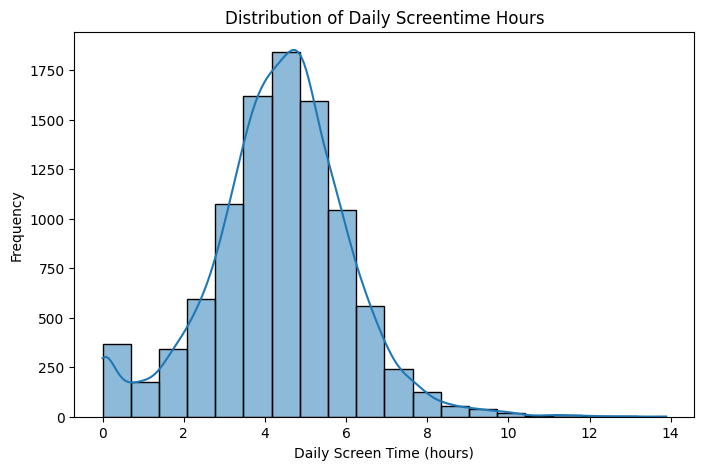

In [23]:
# ------------------ Univariate Analysis ------------------
# 1. Distribution of Daily Screen Time Hours
plt.figure(figsize=(8,5))
sns.histplot(data['Avg_Daily_Screen_Time_hr'], bins=20, kde=True)
plt.title("Distribution of Daily Screentime Hours")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-856907525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age_Band', order=data['Age_Band'].value_counts().index, palette="Set2")


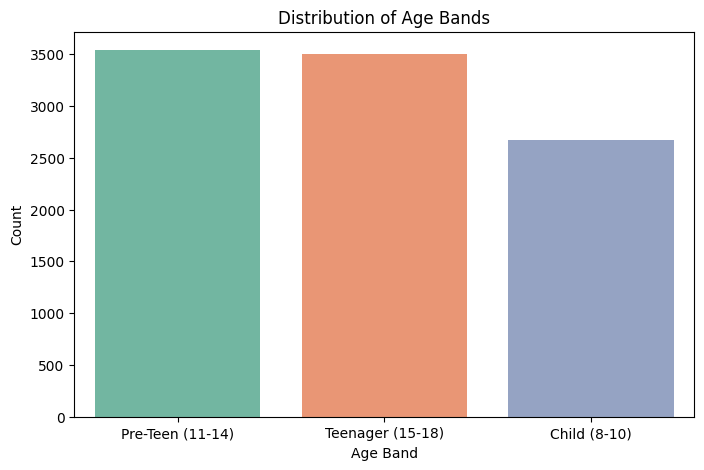

In [24]:
# 2. Distribution of Age Bands
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Age_Band', order=data['Age_Band'].value_counts().index, palette="Set2")
plt.title("Distribution of Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-2187174588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Primary_Device', order=data['Primary_Device'].value_counts().index, palette="Set3")


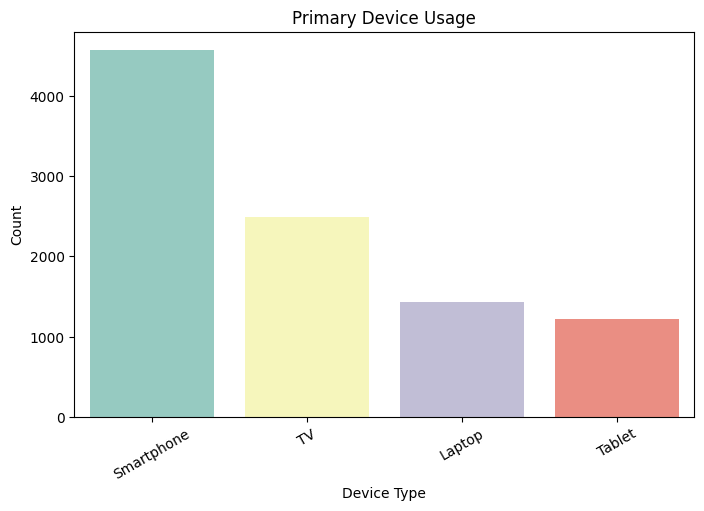

In [25]:
# 3. Distribution of Device Usage
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Primary_Device', order=data['Primary_Device'].value_counts().index, palette="Set3")
plt.title("Primary Device Usage")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


/tmp/ipython-input-2596358604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Avg_Daily_Screen_Time_hr', palette="coolwarm")


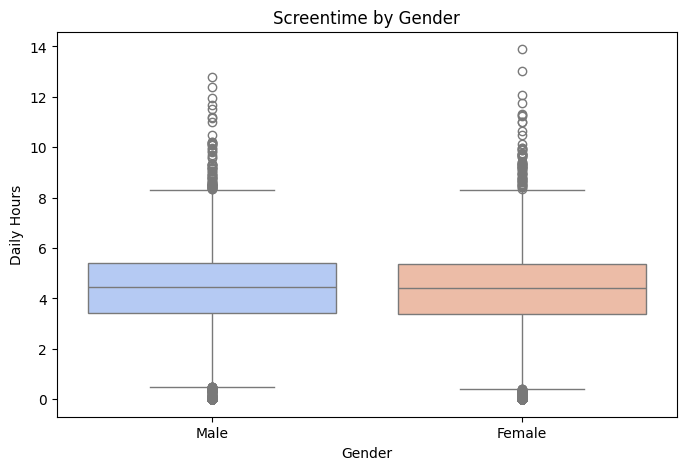

In [27]:
# ------------------ Bivariate Analysis ------------------
# 4. Compare Screentime by Gender
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Gender', y='Avg_Daily_Screen_Time_hr', palette="coolwarm")
plt.title("Screentime by Gender")
plt.xlabel("Gender")
plt.ylabel("Daily Hours")
plt.show()

/tmp/ipython-input-3733019096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age_Band', y='Avg_Daily_Screen_Time_hr', palette="viridis")


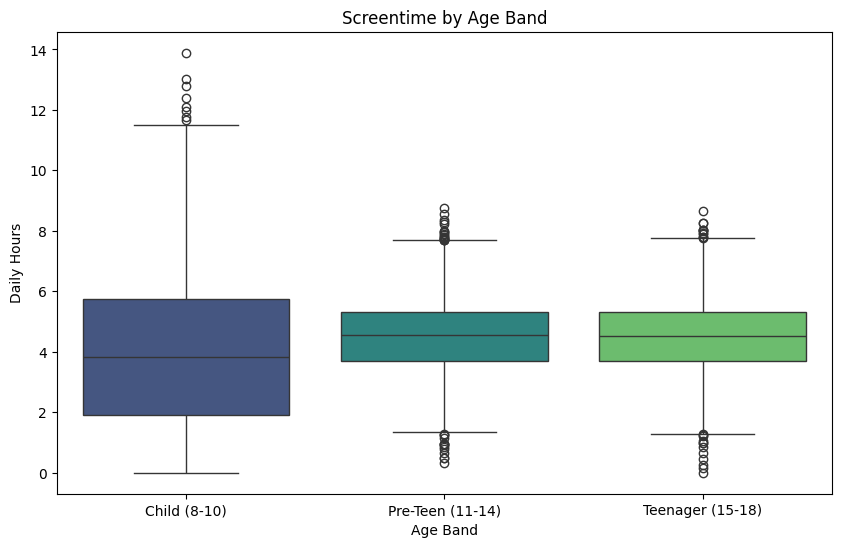

In [29]:
# 5. Compare Screentime by Age Band
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age_Band', y='Avg_Daily_Screen_Time_hr', palette="viridis")
plt.title("Screentime by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Daily Hours")
plt.show()

/tmp/ipython-input-1745860723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', estimator='mean', palette="Set1")


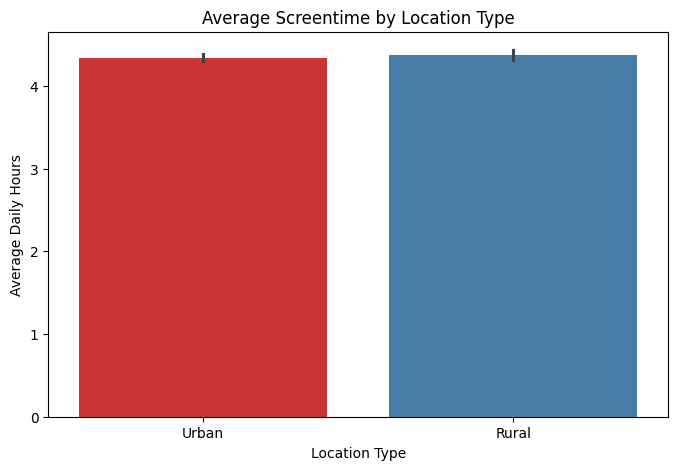

In [31]:
# 6. Compare Screentime by Location Type (Urban vs Rural)
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', estimator='mean', palette="Set1")
plt.title("Average Screentime by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Average Daily Hours")
plt.show()

/tmp/ipython-input-2543826939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hours = data.groupby("Age_Band")['Avg_Daily_Screen_Time_hr'].mean().reset_index()


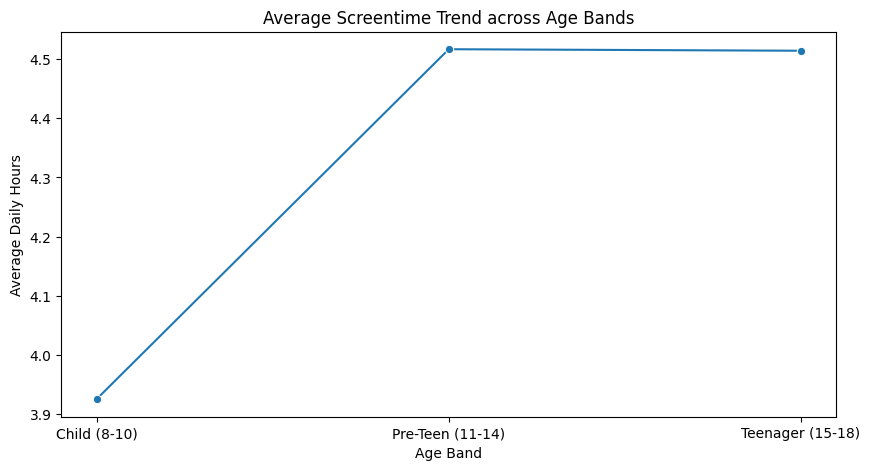

In [33]:
# 7. Line Plot – Average Screentime across Age Bands
age_hours = data.groupby("Age_Band")['Avg_Daily_Screen_Time_hr'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=age_hours, x="Age_Band", y="Avg_Daily_Screen_Time_hr", marker="o")
plt.title("Average Screentime Trend across Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Hours")
plt.show()

Week 3 Summary – Univariate & Bivariate Visual Analysis

In this week, we explored the dataset Indian Kids Screentime 2025 using univariate and bivariate visual analysis.

Univariate Analysis :-

1.Daily Screentime Hours – Distribution showed most kids spend 3–5 hours/day, with a few heavy users crossing 8+ hours/day.

2.Age Bands – Majority belong to 13–15 years group, while younger groups (8–10) are fewer.

3.Device Usage – Smartphones are the most common device, followed by tablets and PCs.

Bivariate Analysis :-

1.Screentime by Gender – Boys generally spend slightly more time than girls, with greater variation.

2.Screentime by Age Band – Older kids (15–18 years) have the highest screentime, while younger ones (8–12) spend less.

3.Screentime by Location – Urban kids spend more hours than rural kids, showing lifestyle and digital access differences.

4.Trend Across Age Bands – Screentime increases steadily with age, peaking at 16–18 years.

Visual Tools Used :-

Histograms → Distribution of daily hours.

Bar Charts → Age bands, device usage, and average screentime by location.

Boxplots → Screentime by gender and age bands.

Line Plot → Trend of screentime across age bands.